In [1]:
from datasets import load_dataset, ReadInstruction
import spacy
import pandas as pd
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
from transformers import AutoTokenizer
import numpy as np
# notebook tqdm
from tqdm.notebook import tqdm

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
# df_deduped_pythia = pd.read_pickle("../data/deduped_pythia.pkl")

In [3]:
# df_duped_pythia = pd.read_pickle("../data/duped_pythia.pkl")

In [4]:
def get_avg_dependency_length(sentence):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    ls_lengths = []
    for token in doc:
        for child in token.children:
            distance = child.i - token.i
            # print(f"{token.text} --{child.dep_}--> {child.text}  (distance: {distance})")
            ls_lengths.append(abs(distance))
    return np.mean(ls_lengths)

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-410m-deduped")

def get_string(token_indices):
    # token_indices = list(token_indices)
    return tokenizer.decode(token_indices)

In [5]:
# df_deduped_pythia['first_64_tokens'] = df_deduped_pythia['tokens'].parallel_apply(lambda x: x[:64])
# df_deduped_pythia['first_64_tokens_string'] = df_deduped_pythia['first_64_tokens'].parallel_apply(get_string)
# deduped_value_counts = df_deduped_pythia['is_memorized'].value_counts()
# min_count = deduped_value_counts.min()
# df_deduped_pythia_min = df_deduped_pythia.groupby('is_memorized').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
# ls_first_64_tokens_string = df_deduped_pythia_min['first_64_tokens_string'].to_list()

# from concurrent.futures import ThreadPoolExecutor, as_completed
# import os
# ls_dependency_lengths = []
# # use a thread pool to parallelize the computation of dependency lengths
# with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
#     futures = [executor.submit(get_avg_dependency_length, sent) for sent in ls_first_64_tokens_string]

#     # use tqdm to display a progress bar while the threads are running
#     for future in tqdm(as_completed(futures), total=len(futures)):
#         ls_dependency_lengths.append(future.result())

# # print the list of average dependency lengths for each sentence
# print(ls_dependency_lengths)

# import pickle
# # save the list of average dependency lengths for each sentence
# with open("../data/ls_dependency_lengths.pkl", "wb") as f:
#     pickle.dump(ls_dependency_lengths, f)

# df_deduped_pythia_min['dependency_length'] = ls_dependency_lengths

# # mean dependency length for memorized sentences based on is_memorized
# df_deduped_pythia_min.groupby('is_memorized')['dependency_length'].mean()

# df_deduped_pythia_min.to_pickle("../data/df_deduped_pythia_min_with_dependency_length.pkl")

In [6]:
# df_duped_pythia['first_64_tokens'] = df_duped_pythia['tokens'].parallel_apply(lambda x: x[:64])
# df_duped_pythia['first_64_tokens_string'] = df_duped_pythia['first_64_tokens'].parallel_apply(get_string)
# duped_value_counts = df_duped_pythia['is_memorized'].value_counts()
# min_count = duped_value_counts.min()
# print(duped_value_counts)
# df_duped_pythia_min = df_duped_pythia.groupby('is_memorized').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
# ls_first_64_tokens_string = df_duped_pythia_min['first_64_tokens_string'].to_list()

# from concurrent.futures import ThreadPoolExecutor, as_completed
# import os
# ls_dependency_lengths_duped = []
# # use a thread pool to parallelize the computation of dependency lengths
# with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
#     futures = [executor.submit(get_avg_dependency_length, sent) for sent in ls_first_64_tokens_string]

#     # use tqdm to display a progress bar while the threads are running
#     for future in tqdm(as_completed(futures), total=len(futures)):
#         ls_dependency_lengths_duped.append(future.result())

# # print the list of average dependency lengths for each sentence
# print(ls_dependency_lengths_duped)

# import pickle
# # save the list of average dependency lengths for each sentence
# with open("../data/ls_dependency_lengths_duped.pkl", "wb") as f:
#     pickle.dump(ls_dependency_lengths_duped, f)

# df_duped_pythia_min['dependency_length'] = ls_dependency_lengths_duped

# # mean dependency length for memorized sentences based on is_memorized
# print(df_duped_pythia_min.groupby('is_memorized')['dependency_length'].mean())

# df_duped_pythia_min.to_pickle("../data/df_duped_pythia_min_with_dependency_length.pkl")

In [7]:
df_duped_pythia_min = pd.read_pickle("../data/df_duped_pythia_min_with_dependency_length.pkl")
df_deduped_pythia_min = pd.read_pickle("../data/df_deduped_pythia_min_with_dependency_length.pkl")

In [13]:
# highest and lowest dependency length for memorized sentences based on is_memorized
print(df_deduped_pythia_min.groupby('is_memorized')['dependency_length'].max())
print(df_deduped_pythia_min.groupby('is_memorized')['dependency_length'].min())

is_memorized
False    33.532787
True     70.566879
Name: dependency_length, dtype: float64
is_memorized
False    1.0
True     1.0
Name: dependency_length, dtype: float64


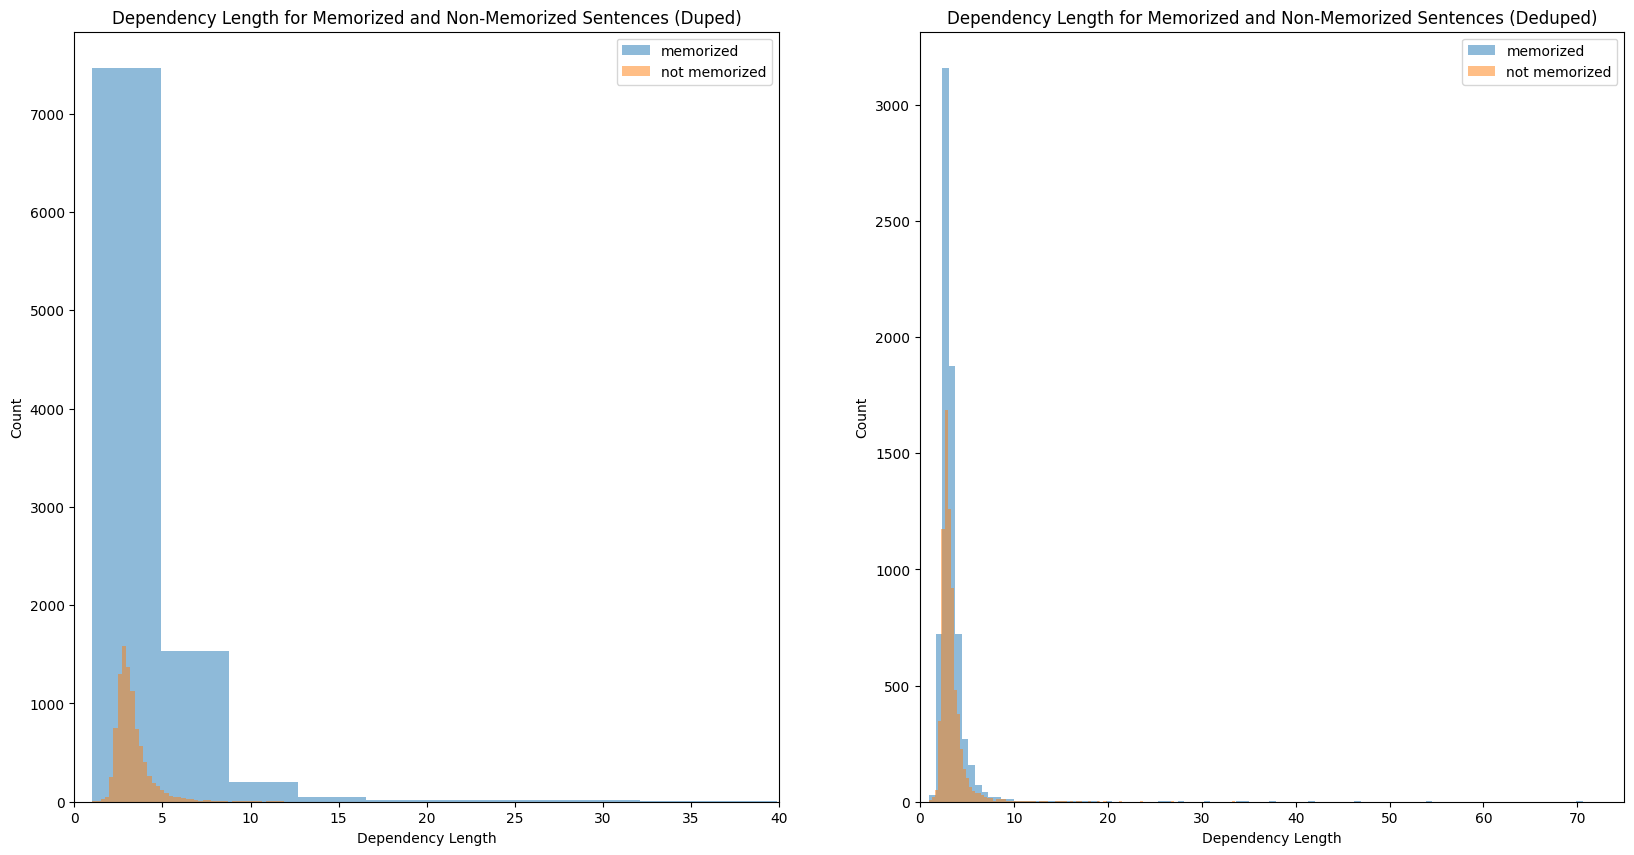

In [15]:
# plot dependency length for memorized and non-memorized sentences as histograms
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(df_duped_pythia_min[df_duped_pythia_min['is_memorized'] == 1]['dependency_length'], bins=100, alpha=0.5, label='memorized')
ax[0].hist(df_duped_pythia_min[df_duped_pythia_min['is_memorized'] == 0]['dependency_length'], bins=100, alpha=0.5, label='not memorized')
ax[0].set_title('Dependency Length for Memorized and Non-Memorized Sentences (Duped)')
# x axis 0 - 75
ax[0].set_xlim(0, 40)
ax[0].set_xlabel('Dependency Length')
ax[0].set_ylabel('Count')
ax[0].legend()
ax[1].hist(df_deduped_pythia_min[df_deduped_pythia_min['is_memorized'] == 1]['dependency_length'], bins=100, alpha=0.5, label='memorized')
ax[1].hist(df_deduped_pythia_min[df_deduped_pythia_min['is_memorized'] == 0]['dependency_length'], bins=100, alpha=0.5, label='not memorized')
ax[1].set_title('Dependency Length for Memorized and Non-Memorized Sentences (Deduped)')
ax[1].set_xlim(0, 75)
ax[1].set_xlabel('Dependency Length')
ax[1].set_ylabel('Count')
ax[1].legend()
plt.show()

In [19]:
# print top 50 highest dependency length sentences for memorized and non-memorized sentences for duped and deduped
top_50_duped_memorized = df_duped_pythia_min[df_duped_pythia_min['is_memorized'] == 1].sort_values('dependency_length', ascending=False).head(50)
top_50_duped_not_memorized = df_duped_pythia_min[df_duped_pythia_min['is_memorized'] == 0].sort_values('dependency_length', ascending=False).head(50)
top_50_deduped_memorized = df_deduped_pythia_min[df_deduped_pythia_min['is_memorized'] == 1].sort_values('dependency_length', ascending=False).head(50)
top_50_deduped_not_memorized = df_deduped_pythia_min[df_deduped_pythia_min['is_memorized'] == 0].sort_values('dependency_length', ascending=False).head(50)

In [22]:
# save as csv
top_50_duped_memorized.to_csv("../data/top_50_duped_memorized.csv")
top_50_duped_not_memorized.to_csv("../data/top_50_duped_not_memorized.csv")
top_50_deduped_memorized.to_csv("../data/top_50_deduped_memorized.csv")
top_50_deduped_not_memorized.to_csv("../data/top_50_deduped_not_memorized.csv")